<a href="https://colab.research.google.com/github/Vladimirvalse/codecodelab/blob/master/1_turtle_agent_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
df = web.DataReader ('AXP', data_source='yahoo', start='2017-01-01', end='2021-05-20')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,75.750000,74.739998,74.889999,75.349998,5853900.0,71.786514
2017-01-04,76.550003,75.059998,75.260002,76.260002,4635800.0,72.963348
2017-01-05,76.180000,74.820000,76.000000,75.320000,3383000.0,72.063995
2017-01-06,75.919998,75.059998,75.400002,75.470001,3089600.0,72.207504
2017-01-09,76.500000,75.529999,76.139999,75.860001,4818700.0,72.580635


In [0]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
Date,,,,
2017-01-03,0.0,75.349998,NaN,NaN
2017-01-04,0.0,76.260002,NaN,NaN
2017-01-05,0.0,75.320000,NaN,NaN
2017-01-06,0.0,75.470001,NaN,NaN
2017-01-09,0.0,75.860001,NaN,NaN
...,...,...,...,...
2020-01-17,-1.0,131.520004,130.550003,112.540001
2020-01-21,0.0,130.529999,131.520004,112.540001
2020-01-22,0.0,131.490005,131.520004,112.540001


In [0]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [0]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 116: cannot sell anything, inventory 0
day 120: cannot sell anything, inventory 0
day 121: cannot sell anything, inventory 0
day 122: cannot sell anything, inventory 0
day 124: cannot sell anything, inventory 0
day 125: cannot sell anything, inventory 0
day 132: cannot sell anything, inventory 0
day 135: cannot sell anything, inventory 0
day 136: cannot sell anything, inventory 0
day 148: cannot sell anything, inventory 0
day 155: cannot sell anything, inventory 0
day 156: cannot sell anything, inventory 0
day 178: cannot sell anything, inventory 0
day 179: cannot sell anything, inventory 0
day 185: cannot sell anything, inventory 0
day 186: cannot sell anything, inventory 0
day 187: cannot sell anything, inventory 0
day 188: cannot sell anything, inventory 0
day 189: cannot sell anything, inventory 0
day 192: cannot sell anything, inventory 0
day 193: cannot sell anything, inventory 0
day 194: cannot sell anything, inventory 0
day 195: cannot sell anything, inventory 0
day 197: ca

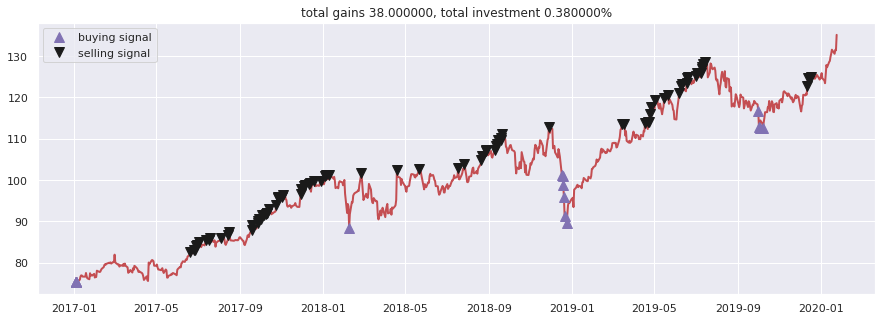

In [0]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()